# Modelling and Evaluation

In [161]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# from PIL import Image

import matplotlib.pyplot as plt
import os
# import PIL
# import shutil
# import random
# import glob
# import itertools

In [162]:
os.chdir(os.path.expanduser('~'))
os.chdir('Desktop/skin')

train_dir = 'inputs/cancer-dataset/train'
test_dir = 'inputs/cancer-dataset/test'
val_dir = 'inputs/cancer-dataset/validate'

## Data Preprocessing

In [163]:
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

train_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

test_batches = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

valid_batches = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

Found 7010 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


## Build CNN and Train
* This step can be skipped if a model has been trained previously.

In [164]:
model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=7, activation='softmax'),
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │     1,404,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,424,455 (5.43 MB)

 Trainable params: 1,424,391 (5.43 MB)

 Non-trainable params: 64 (256.00 B)

In [165]:
model.compile(optimizer= Adam(learning_rate = 0.0001), 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])

Training step, can be time consuming. The trained model is saved, so predictions can be tested without retraining the model.

In [166]:
model.fit(
    x=train_batches, 
    validation_data=valid_batches,
    epochs=10, 
    verbose=2)
model.save('outputs/model.keras')

Epoch 1/10
220/220 - 201s - 915ms/step - accuracy: 0.6668 - loss: 1.2462 - val_accuracy: 0.6407 - val_loss: 1.0556
Epoch 2/10
220/220 - 199s - 906ms/step - accuracy: 0.7830 - loss: 0.6238 - val_accuracy: 0.6567 - val_loss: 1.0113
Epoch 3/10
220/220 - 207s - 940ms/step - accuracy: 0.8522 - loss: 0.4240 - val_accuracy: 0.6986 - val_loss: 0.8577
Epoch 4/10
220/220 - 205s - 930ms/step - accuracy: 0.8783 - loss: 0.3501 - val_accuracy: 0.7136 - val_loss: 0.8971
Epoch 5/10
220/220 - 206s - 936ms/step - accuracy: 0.9264 - loss: 0.2316 - val_accuracy: 0.6966 - val_loss: 1.1214
Epoch 6/10
220/220 - 206s - 934ms/step - accuracy: 0.9415 - loss: 0.1893 - val_accuracy: 0.6866 - val_loss: 0.9822
Epoch 7/10
220/220 - 206s - 935ms/step - accuracy: 0.9623 - loss: 0.1274 - val_accuracy: 0.6896 - val_loss: 1.3072
Epoch 8/10


### Model Evaluation

This step requires training the model, or there will be no history data.  

In [ ]:
metrics = model.history.history

train_loss = metrics["loss"]
train_accuracy = metrics["accuracy"]

val_loss = metrics["val_loss"]
val_accuracy = metrics["val_accuracy"]

plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
plt.title("Loss.")
plt.plot(train_loss, label = "Train");
plt.plot(val_loss, label = "Validation");
plt.grid(True)
plt.legend(loc = "best");

plt.subplot(1,2,2)
plt.title("Accuracy.")
plt.plot(train_accuracy, label = "Train");
plt.plot(val_accuracy, label = "Validation");
plt.grid(True)
plt.legend(loc = "best");

## Model Prediction

In [ ]:
model = load_model('outputs/model.keras')

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)
np.round(predictions)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
true_labels = test_batches.classes
predicted_labels = np.argmax(predictions, axis=1)
class_names = {v: k for k, v in test_batches.class_indices.items()}
report = classification_report(true_labels, predicted_labels, target_names=class_names.values())
print(report)

              precision    recall  f1-score   support

       akiec       0.04      0.03      0.03        61
         mel       0.14      0.12      0.13       232
          nv       0.68      0.69      0.68      1325
         bcc       0.10      0.07      0.08       113
          df       0.50      0.04      0.08        24
        vasc       0.00      0.00      0.00        30
         bkl       0.11      0.14      0.12       218

    accuracy                           0.49      2003
   macro avg       0.22      0.16      0.16      2003
weighted avg       0.49      0.49      0.49      2003



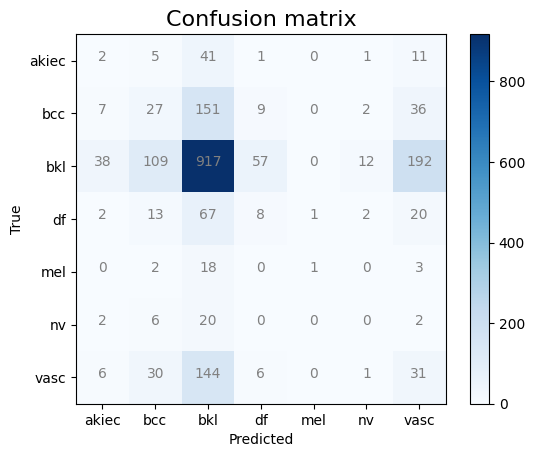

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize=16)
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True')
plt.xlabel('Predicted')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="gray")